### Project Name: Exploring Bank Transaction Dataset

#### Project Members:
1. Piyush Borse     (25PGAI0026)
2. Prateek Muzumdar (25PGAI0027)
3. Neha 
4. Yuvraj Singh
5. Bhawana 
6. Prajwal Wagh

In [0]:
#DatasetLink :- https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation
#/FileStore/tables/bank_transactions.csv

###Bank Customer Segmentation
Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.

###About this Dataset
This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

###Interesting Analysis Ideas
The dataset can be used for different analysis, example -

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum
spark = SparkSession.builder \
    .appName("Big Data Engineering Project") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

## Loading the dataset

Data is provided in *csv* format and contains header in the first line. Spark provides *sqlContext.read.csv* to read the csv data and create the dataframe. Spark can automatically infer the schema from the data if *inferSchema* is set to True.

In [0]:
%fs ls /FileStore/tables/bank_transactions.csv

path,name,size,modificationTime
dbfs:/FileStore/tables/bank_transactions.csv,bank_transactions.csv,67564190,1720884741000


##Read records using Custom Schema
We can also read the data using our own custom defined schema. For example, Date column can be read as DateType rather than Timestamp, it is mostly contains the date information.

In [0]:
#%fs head /FileStore/tables/bank_transactions.csv

[Truncated to first 65536 bytes]
TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25
T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999
T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459
T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060
T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
T6,C1536588,8/10/72,F,ITANAGAR,53609.2,2/8/16,173940,676
T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566
T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148
T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833
T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11
T11,C5430833,22/7/82,M,MOHALI,48429.49,2/8/16,204133,259
T12,C6939838,7/7/88,M,GUNTUR,14613.46,2/8/16,205108,202
T13,C6339347,13/6/78,M,AHMEDABAD,32274.78,2/8/16,203834,12300
T14,C8327851,5/1/92,F,THANE,59950.44,1/8/16,84706,50
T15,C7917151,24/3/78,M,PUNE,10100.84,1/8/16,82253,338
T16,C8334633,10/7/68,F,NEW DELHI,1283.12,1/8/16,125725,250
T17,C1376215,1/1/1800,M,MUMBAI,77495.15,1/8/16,124727,1423.11
T18,C8967349,16/7/89,M,MUMBAI,2177.85,1/8/16,124734,54
T19,C3732016,11/1/91,M,MUMBAI,32816.17,1/8/16,122135,315
T20,C8999019,24/6/85,M,PUNE,10643.5,1/8/16,152821,945
T21,C6121429,20/4/93,M,NO 3 KALYANI NAGAR PUNE,2934.22,1/8/16,152824,36
T22,C4511244,31/8/89,F,SECUNDERABAD,4470.15,3/8/16,105329,27
T23,C7018081,1/1/1800,M,WAYS PANCHKUVA AHMEDABAD,143.07,3/8/16,104718,110
T24,C5830215,1/10/86,M,LUCKNOW,12868.42,3/8/16,125629,291
T25,C1219943,17/5/91,F,GURGAON,2951.1,3/8/16,124834,1892
T26,C5521085,24/2/93,M,GURGAON,3297.74,3/8/16,160533,242
T27,C5430368,1/2/86,M,DELHI,285.76,3/8/16,160537,5500
T28,C2416848,1/4/93,M,CHENNAI,20986.66,3/8/16,160544,2235
T29,C7935438,1/1/1800,M,MOHALI,969436.12,3/8/16,183634,36.9
T30,C8736958,19/12/86,M,GRAM PANCHAYTH HYDERABAD,,3/8/16,160636,2600
T31,C7648712,21/1/67,F,NEW DELHI,298461.05,3/8/16,160642,500
T32,C5652115,26/6/91,F,GHAZIABAD,6384.54,3/8/16,160558,10
T33,C1889073,25/2/85,F,BANGALORE,57791.69,3/8/16,160750,760
T34,C2043652,25/7/79,F,MUMBAI,123781.9,3/8/16,182714,6800
T35,C7017047,23/4/77,M,GURGAON,39.73,3/8/16,182715,110
T36,C1211387,1/1/1800,M,AHMEDABAD,11791.25,3/8/16,125915,1075
T37,C4320949,25/10/84,F,CHENNAI,213.06,3/8/16,182915,1081
T38,C2331533,30/12/97,F,GUWAHATI,44627.73,3/8/16,182918,2999
T39,C5338459,3/1/84,M,DHANBAD,113238.74,3/8/16,180948,1350
T40,C5120181,25/6/85,M,MUKTSAR,2477.42,3/8/16,183614,683
T41,C5838935,13/4/83,M,SOCORRO,58406.7,3/8/16,132517,50
T42,C7923455,6/10/92,M,ANDHERI (EAST) MUMBAI,5810.82,3/8/16,221111,12
T43,C2733968,6/12/92,F,AURANGABAD,12545.18,3/8/16,220926,179
T44,C2023055,30/7/93,M,MUMBAI,10630.88,3/8/16,222006,421.8
T45,C1289591,28/10/90,M,KOTA,282455.64,3/8/16,222008,900
T46,C3526781,2/11/80,M,CHENNAI,1589.43,3/8/16,222609,90
T47,C8934588,23/10/81,M,JAIPUR,5055.18,3/8/16,223146,13846
T48,C7542443,29/12/89,M,K V RANGAREDDY,25222.91,3/8/16,223149,59.47
T49,C6427687,4/7/81,M,MUZAFFARNAGAR,2162.36,2/8/16,100019,55
T50,C5242591,1/12/82,M,BURDWAN,22525.66,5/8/16,133136,27990
T51,C8624922,26/6/82,F,GURGAON,298357.41,5/8/16,133139,1388
T52,C6637047,25/7/66,M,PUNE,9956.49,5/8/16,133141,145
T53,C3815912,2/11/94,M,MUMBAI,2058.42,5/8/16,141853,519
T54,C8837044,20/11/88,F,LUDHIANA,8842.13,5/8/16,141704,100
T55,C4237628,10/4/87,M,NOIDA,196.83,5/8/16,165658,150
T56,C1516160,2/10/90,M,GURGAON,17070.89,5/8/16,165657,107
T57,C4415955,7/12/94,M,AGRA,2502.74,5/8/16,165911,1008.63
T58,C3932235,20/8/91,M,SHAHJAHANPUR,91.66,5/8/16,202838,110
T59,C5623837,7/8/84,M,DELHI,947.23,5/8/16,202943,726
T60,C7415323,6/3/89,M,DIST RAIGAD PANVEL,10253.21,5/8/16,202608,4387
T61,C7642737,7/5/88,M,DEHRADUN,27852.19,5/8/16,202725,1500
T62,C2431680,11/4/75,F,BANGALORE,13138.22,5/8/16,202509,412.2
T63,C1130989,22/10/90,M,PUNE,250.26,5/8/16,105850,60
T64,C3928242,1/6/89,M,JAIPUR,10067.44,5/8/16,20265

These are th fields in the Dataset:
1. TransactionID: a unique Id for each transaction
2. CustomerID: a unique Id for each customer
3. CustomerDOB: Date of Birth of customer (will be helpful to calculate age)
4. CustGender: Gender of customer
5. CustLocation: location of customer
6. CustAccountBalance: Account Balance of customer
7. TransactionDate: Date of the Transaction
8. TransactionTime: Time of the Transaction
9. TransactionAmount (INR): Amount of the Transaction

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

# Initialize Spark session
spark = SparkSession.builder.appName("Big Data Engineering Project").getOrCreate()

# Define schema
schema = StructType([
    StructField("TransactionID", StringType(), True),
    StructField("CustomerID", StringType(), True),
    StructField("CustomerDOB", StringType(), True),
    StructField("CustGender", StringType(), True),
    StructField("CustLocation", StringType(), True),
    StructField("CustAccountBalance", FloatType(), True),
    StructField("TransactionDate", StringType(), True),
    StructField("TransactionTime", StringType(), True),
    StructField("TransactionAmount", FloatType(), True)
])

In [0]:
bank_df = spark.read.csv("dbfs:/FileStore/tables/bank_transactions.csv", 
                                header = True,
                                schema = StructType(schema) )
bank_df.cache()
bank_df.printSchema()

root
 |-- TransactionID: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- CustomerDOB: string (nullable = true)
 |-- CustGender: string (nullable = true)
 |-- CustLocation: string (nullable = true)
 |-- CustAccountBalance: float (nullable = true)
 |-- TransactionDate: string (nullable = true)
 |-- TransactionTime: string (nullable = true)
 |-- TransactionAmount: float (nullable = true)



In [0]:
bank_df.show(10)

+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|TransactionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount|
+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|           T1|  C5841053|    10/1/94|         F|  JAMSHEDPUR|          17819.05|         2/8/16|         143207|             25.0|
|           T2|  C2142763|     4/4/57|         M|     JHAJJAR|           2270.69|         2/8/16|         141858|          27999.0|
|           T3|  C4417068|   26/11/96|         F|      MUMBAI|          17874.44|         2/8/16|         142712|            459.0|
|           T4|  C5342380|    14/9/73|         F|      MUMBAI|          866503.2|         2/8/16|         142714|           2060.0|
|           T5|  C9031234|    24/3/88|         F| NAVI MUMBAI|           671

##2. Data Transformation and Cleaning
- Convert date strings to date type
- Handle missing values
- Filter out invalid data (e.g., unrealistic DOBs)

In [0]:
from pyspark.sql.functions import col, to_date, lit,date_format

# Convert date columns to date type
bank_df = bank_df.withColumn("CustomerDOB", to_date(col("CustomerDOB"), "d/M/yy"))

bank_df = bank_df.withColumn("TransactionDate", to_date(col("TransactionDate"), "d/M/yy"))

In [0]:
bank_df.show()

+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|TransactionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount|
+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|           T1|  C5841053| 1994-01-10|         F|  JAMSHEDPUR|          17819.05|     2016-08-02|         143207|             25.0|
|           T2|  C2142763| 1957-04-04|         M|     JHAJJAR|           2270.69|     2016-08-02|         141858|          27999.0|
|           T3|  C4417068| 1996-11-26|         F|      MUMBAI|          17874.44|     2016-08-02|         142712|            459.0|
|           T4|  C5342380| 1973-09-14|         F|      MUMBAI|          866503.2|     2016-08-02|         142714|           2060.0|
|           T5|  C9031234| 1988-03-24|         F| NAVI MUMBAI|           671

In [0]:
# Handle missing values (e.g., fill with average or drop)
bank_df = bank_df.fillna({"CustAccountBalance": 0, "TransactionAmount": 0})

# Filter out unrealistic DOBs
bank_df = bank_df.filter(col("CustomerDOB") > lit("1900-01-01"))

bank_df.show(10)

+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|TransactionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount|
+-------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+
|           T1|  C5841053| 1994-01-10|         F|  JAMSHEDPUR|          17819.05|     2016-08-02|         143207|             25.0|
|           T2|  C2142763| 1957-04-04|         M|     JHAJJAR|           2270.69|     2016-08-02|         141858|          27999.0|
|           T3|  C4417068| 1996-11-26|         F|      MUMBAI|          17874.44|     2016-08-02|         142712|            459.0|
|           T4|  C5342380| 1973-09-14|         F|      MUMBAI|          866503.2|     2016-08-02|         142714|           2060.0|
|           T5|  C9031234| 1988-03-24|         F| NAVI MUMBAI|           671

##3. Define Business Insights
Let's define seven key business insights we want to derive from the data:

1. Total Transaction Amount per Customer Location (Filter, Projection, Group By).
2. Top 3 Customers by Transaction Amount in Each Location (Partition Over Ranking Function).
3. Moving Average of Transaction Amount for Each Customer (Moving Average).
4. Gender-wise distribution of transactions.
5. Average account balance per location.
6. Highest transaction amount per day.
7. Customer age distribution.

##4. Pipeline Creation for Insights
We'll create pipelines for two complex operations:

###Insight 1:Total Transaction Amount per Customer Location (Filter, Projection, Group By)

In [0]:
df_clean = bank_df.filter(bank_df["CustomerID"].isNotNull() & bank_df["CustLocation"].isNotNull() & bank_df["TransactionAmount"].isNotNull())

In [0]:
from pyspark.sql.functions import max

# Assuming your DataFrame is named df_clean and the transaction date column is named TransactionDate

# Get the latest transaction date
latest_transaction_date = df_clean.agg(max("TransactionDate").alias("LatestTransactionDate")).collect()[0]["LatestTransactionDate"]

print(f"The latest transaction date is: {latest_transaction_date}")

The latest transaction date is: 2016-10-21


In [0]:
from pyspark.sql.functions import sum, round

# Group by CustLocation and calculate the total transaction amount rounded to 2 decimal places
location_transaction_amount = df_clean.groupBy("CustLocation") \
    .agg(round(sum("TransactionAmount"), 2).alias("TotalTransactionAmount"))

# Convert to Pandas DataFrame for plotting
location_transaction_amount_pd = location_transaction_amount.toPandas()
location_transaction_amount_pd = location_transaction_amount_pd.sort_values(by="TotalTransactionAmount", ascending=False).head(20)

In [0]:
location_transaction_amount_pd.head()

,CustLocation,TotalTransactionAmount
4213,MUMBAI,1.622702e+08
243,NEW DELHI,1.308523e+08
1220,BANGALORE,1.055710e+08
3391,GURGAON,1.012430e+08
1219,DELHI,9.346726e+07


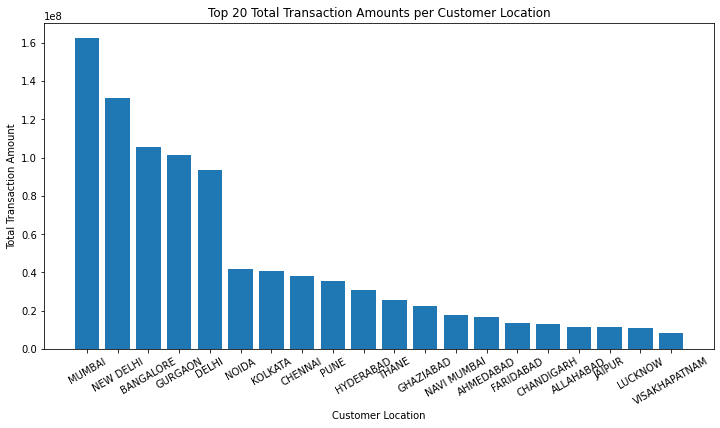

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(location_transaction_amount_pd['CustLocation'], location_transaction_amount_pd['TotalTransactionAmount'])
plt.xlabel('Customer Location')
plt.ylabel('Total Transaction Amount')
plt.title('Top 20 Total Transaction Amounts per Customer Location')
plt.xticks(rotation=30)
plt.show()

###Insight 2: Top 3 Customers by Transaction Amount in Each Location (Partition Over Ranking Function)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
from pyspark.sql.functions import col, sum, rank
from pyspark.sql.window import Window

# Step 1: Group by CustLocation and CustomerID, then calculate the total transaction amount
location_customer_transaction = df_clean.groupBy("CustLocation", "CustomerID") \
    .agg(sum("TransactionAmount").alias("TotalTransactionAmount"))

# Step 2: Use a window function to rank the customers by transaction amount within each location
window_spec = Window.partitionBy("CustLocation").orderBy(col("TotalTransactionAmount").desc())
location_customer_transaction = location_customer_transaction.withColumn("rank", rank().over(window_spec))

# Step 3: Filter to get the top 3 customers in each location
top_3_customers_per_location = location_customer_transaction.filter(col("rank") <= 3)

# Step 4: Convert the resulting DataFrame to Pandas for plotting
top_3_customers_per_location_pd = top_3_customers_per_location.toPandas()



In [0]:
top_3_customers_per_location_pd.head()

,CustLocation,CustomerID,TotalTransactionAmount,rank
0,(N) 24 PGS,C8966067,2400.0,1
1,(N) 24 PGS,C2966067,1867.0,2
2,(N) 24 PGS,C1166072,1750.0,3
3,(VIA) SALEM,C6134174,3898.0,1
4,(VIA) SALEM,C8134142,3898.0,1


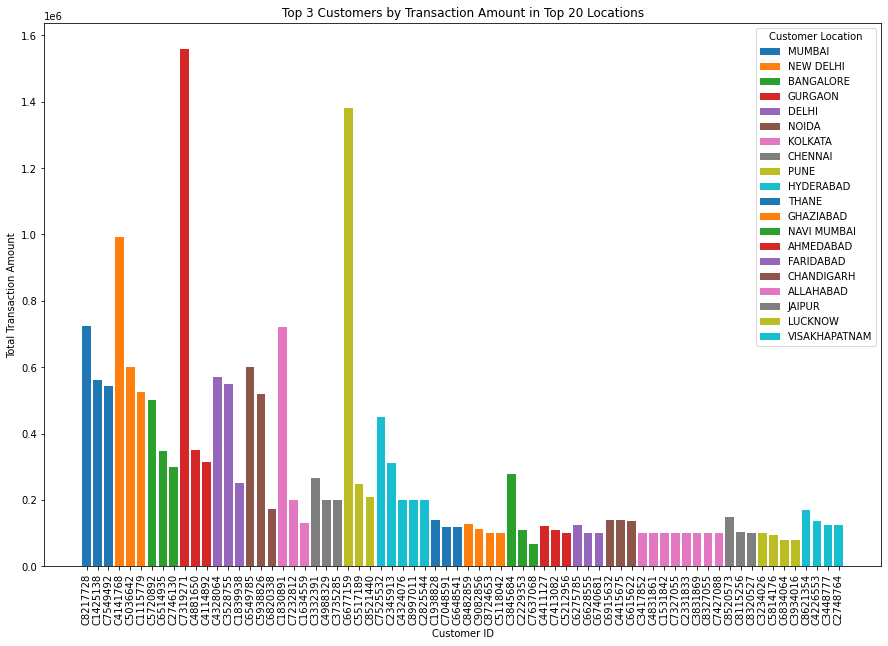

In [0]:
# Step 5: Plot the data
plt.figure(figsize=(15, 10))

# Iterate through each unique location and plot the top 3 customers
for location in location_transaction_amount_pd['CustLocation'].unique():
    location_data = top_3_customers_per_location_pd[top_3_customers_per_location_pd['CustLocation'] == location]
    plt.bar(location_data['CustomerID'], location_data['TotalTransactionAmount'], label=location)

plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.title('Top 3 Customers by Transaction Amount in Top 20 Locations')
plt.xticks(rotation=90)
plt.legend(title='Customer Location')
plt.show()

In [0]:

'''###Insight 1: Total transaction amount per customer

# Convert DataFrame to RDD
rdd = bank_df.rdd

# Example MapReduce: Calculate total transaction amount per customer using RDD
def map_function(row):
    return (row['CustomerID'], row['TransactionAmount'])

def reduce_function(a, b):
    return a + b

total_transaction_amount_rdd = rdd.map(map_function).reduceByKey(reduce_function)
total_transaction_amount_rdd.collect()

# Convert to DataFrame for plotting
total_transaction_amount_rdd_df = total_transaction_amount_rdd.toDF(["CustomerID", "TotalTransactionAmount"]).toPandas()
# Plot total transaction amount per customer using RDD result
top_n = 20
top_customers_rdd = total_transaction_amount_rdd_df.nlargest(top_n, 'TotalTransactionAmount')

plt.figure(figsize=(10, 6))
plt.bar(top_customers_rdd['CustomerID'], top_customers_rdd['TotalTransactionAmount'])
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.title('Top 20 Customers by Total Transaction Amount (RDD)')
plt.xticks(rotation=90)
plt.show()


###Insight 2: Average transaction amount per customer
# Average transaction amount per customer
average_transaction_amount = bank_df.groupBy("CustomerID").avg("TransactionAmount")
average_transaction_amount.show(10)'''

### Insight 3: Moving Average of Transaction Amount for Each Customer (Moving Average)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from pyspark.sql.functions import avg

# Define window specification for moving average
window_spec = Window.partitionBy("CustomerID").orderBy("TransactionDate").rowsBetween(-2, 0)

# Calculate moving average
moving_avg_df = df_clean.withColumn("MovingAvgTransactionAmount", avg("TransactionAmount").over(window_spec))

# Show the result
moving_avg_df.show()

+-------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+--------------------------+
|TransactionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount|MovingAvgTransactionAmount|
+-------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+--------------------------+
|      T401396|  C1010024| 1965-06-21|         M|             KOLKATA|          87058.65|     2016-08-18|         141103|           5000.0|                    5000.0|
|      T303294|  C1010068| 1976-07-14|         M|             GURGAON|          46741.73|     2016-08-10|         101617|            546.0|                     546.0|
|      T113706|  C1010081| 1984-02-11|         F|              HOWRAH|             17.71|     2016-08-06|         145828|           2856.0|                    2856.0

### Insight 4: Gender Wise distribution of Transactions

In [0]:
from pyspark.sql.functions import col, avg
# Filter by gender and calculate average transaction amount
average_transaction_amount_f = df_clean.filter(col("CustGender") == "F").agg(avg("TransactionAmount").alias("AverageTransactionAmount")).collect()
average_transaction_amount_m = df_clean.filter(col("CustGender") == "M").agg(avg("TransactionAmount").alias("AverageTransactionAmount")).collect()


  CustGender  AverageTransactionAmount
0          F               1599.863201
1          M               1397.656467


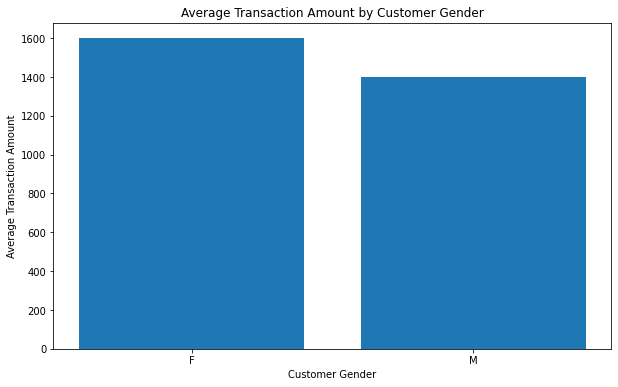

In [0]:
# Convert results to pandas DataFrame for plotting
average_transaction_amount_pd = pd.DataFrame({
    "CustGender": ["F", "M"],
    "AverageTransactionAmount": [average_transaction_amount_f[0]["AverageTransactionAmount"], average_transaction_amount_m[0]["AverageTransactionAmount"]]
})

# Print the result
print(average_transaction_amount_pd)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_transaction_amount_pd['CustGender'], average_transaction_amount_pd['AverageTransactionAmount'])
plt.xlabel('Customer Gender')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Customer Gender')
plt.xticks(rotation=0)
plt.show()

### Insight 5: Age Wise distribution of Transactions

In [0]:
from pyspark.sql.functions import col, to_date, datediff, floor

# Define the current date (2016-10-21) as last transaction date is 2016-10-21
current_date = '2016-10-21'

# Convert CustomerDOB to date format
df_clean = df_clean.withColumn('CustomerDOB', to_date(col('CustomerDOB'), 'dd-MM-yyyy'))

# Calculate age
df_clean = df_clean.withColumn('Age', floor(datediff(to_date(lit(current_date)), col('CustomerDOB')) / 365))

# Show the resulting DataFrame
df_clean.select('CustomerID', 'CustomerDOB', 'Age').show()

+----------+-----------+---+
|CustomerID|CustomerDOB|Age|
+----------+-----------+---+
|  C5841053| 1994-01-10| 22|
|  C2142763| 1957-04-04| 59|
|  C4417068| 1996-11-26| 19|
|  C5342380| 1973-09-14| 43|
|  C9031234| 1988-03-24| 28|
|  C1536588| 1972-10-08| 44|
|  C7126560| 1992-01-26| 24|
|  C1220223| 1982-01-27| 34|
|  C8536061| 1988-04-19| 28|
|  C6638934| 1984-06-22| 32|
|  C5430833| 1982-07-22| 34|
|  C6939838| 1988-07-07| 28|
|  C6339347| 1978-06-13| 38|
|  C8327851| 1992-01-05| 24|
|  C7917151| 1978-03-24| 38|
|  C8334633| 1968-07-10| 48|
|  C8967349| 1989-07-16| 27|
|  C3732016| 1991-01-11| 25|
|  C8999019| 1985-06-24| 31|
|  C6121429| 1993-04-20| 23|
+----------+-----------+---+
only showing top 20 rows



In [0]:
# Filter out below 18 Customers
df_clean = df_clean.filter(col('Age') >= 0)

# Group by Age and calculate the total transaction amount
age_transaction_amount = df_clean.groupBy('Age') \
    .agg(_sum('TransactionAmount').alias('TotalTransactionAmount'))

# Sort by Age in ascending order
age_transaction_amount_sorted = age_transaction_amount.orderBy('Age')
age_transaction_amount_sorted.show()

+---+----------------------+
|Age|TotalTransactionAmount|
+---+----------------------+
|  0|    10086.719970703125|
|  1|    19899.599639892578|
|  2|       47190.669921875|
|  3|     246939.3992614746|
|  4|     34825.26010131836|
|  6|      124385.779296875|
|  7|               35332.0|
|  8|     46400.70001029968|
|  9|      50547.8698425293|
| 10|     49662.58947753906|
| 11|     157999.9001159668|
| 12|    108945.63007354736|
| 13|       109768.66015625|
| 14|    183210.35990476608|
| 15|     368452.6297683716|
| 16|    339085.62980151176|
| 17|     970671.6598041058|
| 18|     3379760.639811814|
| 19|     6185261.208389897|
| 20|  1.0194237732445717E7|
+---+----------------------+
only showing top 20 rows



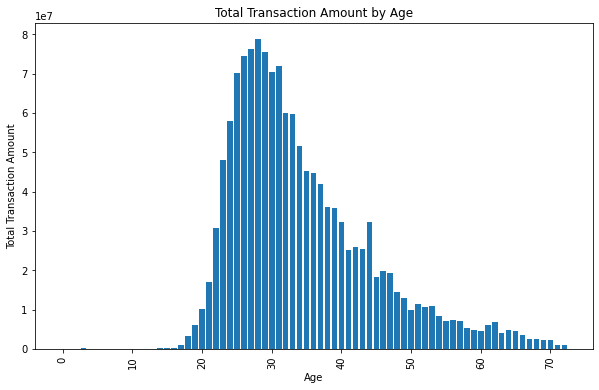

In [0]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
age_transaction_amount_pd = age_transaction_amount_sorted.toPandas()

# Plotting the total transaction amount for each age
plt.figure(figsize=(10, 6))
plt.bar(age_transaction_amount_pd['Age'], age_transaction_amount_pd['TotalTransactionAmount'])
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Age')
plt.xticks(rotation=90)
plt.show()

### Insight 6: Age and Gender Wise distribution of Transactions

In [0]:
# Group by Age and Gender, and calculate the total transaction amount
age_gender_transaction_amount = df_clean.groupBy('Age', 'CustGender') \
    .agg(_sum('TransactionAmount').alias('TotalTransactionAmount'))

# Sort by Age in ascending order
age_gender_transaction_amount_sorted = age_gender_transaction_amount.orderBy('Age', 'CustGender')

# Convert to Pandas DataFrame for plotting
age_gender_transaction_amount_pd = age_gender_transaction_amount_sorted.toPandas()
age_Gender_transaction_amount_sorted.show()

+---+----------+----------------------+
|Age|CustGender|TotalTransactionAmount|
+---+----------+----------------------+
|  0|         M|    10086.719970703125|
|  1|         M|    19899.599639892578|
|  2|         F|        4040.669921875|
|  2|         M|               43150.0|
|  3|         M|     246713.3992614746|
|  3|         F|                 226.0|
|  4|         M|    22254.770111083984|
|  4|         F|    12570.489990234375|
|  6|         F|      107959.779296875|
|  6|         M|               16426.0|
|  7|         M|               35332.0|
|  8|         M|     33381.97002983093|
|  8|         F|     13018.72998046875|
|  9|         F|    4040.3699951171875|
|  9|         M|     46507.49984741211|
| 10|         F|                  25.0|
| 10|         M|     49637.58947753906|
| 11|         F|     59483.18994140625|
| 11|      null|     56556.10006713867|
| 11|         M|    41960.610107421875|
+---+----------+----------------------+
only showing top 20 rows



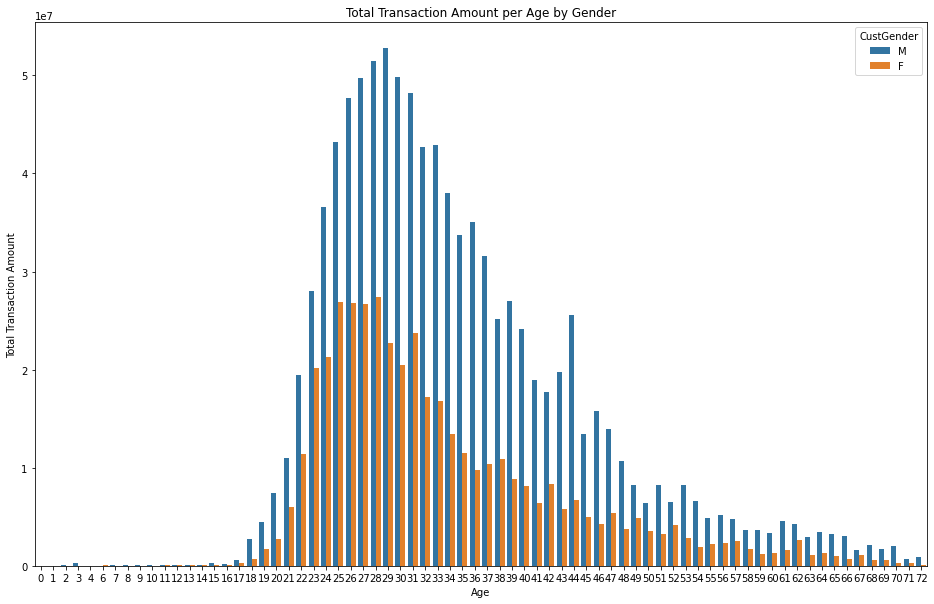

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the total transaction amount for each age by gender
plt.figure(figsize=(16, 10))
sns.barplot(data=age_gender_transaction_amount_pd, x='Age', y='TotalTransactionAmount', hue='CustGender')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount per Age by Gender')
plt.xticks()
plt.legend(title='CustGender')
plt.show()

### Insight 7: Total Customer Balance as for Age


In [0]:
# Group by Age and Gender, and calculate the total CustAccountBalance amount
age_gender_CustAccountBalance = df_clean.groupBy('Age', 'CustGender') \
    .agg(_sum('CustAccountBalance').alias('TotalCustAccountBalance'))

# Sort by Age in ascending order
age_gender_CustAccountBalance_sorted = age_gender_CustAccountBalance.orderBy('Age', 'CustGender')

# Convert to Pandas DataFrame for plotting
age_gender_CustAccountBalance_pd = age_gender_CustAccountBalance_sorted.toPandas()
age_gender_CustAccountBalance_sorted.show()

+---+----------+-----------------------+
|Age|CustGender|TotalCustAccountBalance|
+---+----------+-----------------------+
|  0|         M|      350456.4743652344|
|  1|         M|     509061.98703193665|
|  2|         F|         528540.3984375|
|  2|         M|      5363147.709838867|
|  3|         F|     30.610000610351562|
|  3|         M|         936089.7421875|
|  4|         F|     19767.929931640625|
|  4|         M|      1467268.221069336|
|  6|         F|                    0.0|
|  6|         M|       377271.857421875|
|  7|         M|       2324799.19921875|
|  8|         F|      720709.6440429688|
|  8|         M|      1524872.181640625|
|  9|         F|      8103.150146484375|
|  9|         M|        591454.84765625|
| 10|         F|         55569.94921875|
| 10|         M|     1022859.7056126595|
| 11|      null|        579675.73828125|
| 11|         F|     1990106.0161132812|
| 11|         M|     385210.49334716797|
+---+----------+-----------------------+
only showing top

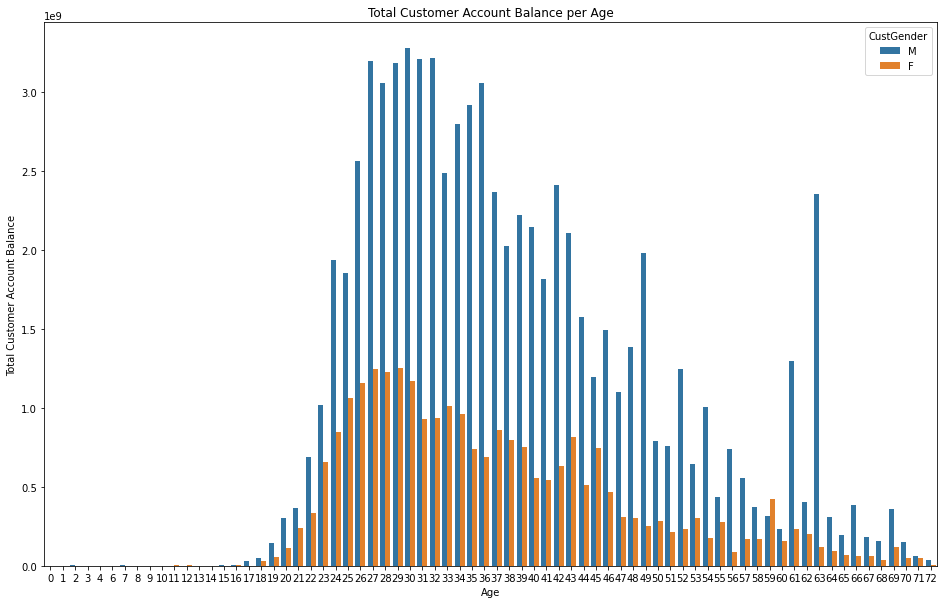

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the total transaction amount for each age by gender
plt.figure(figsize=(16, 10))
sns.barplot(data=age_gender_CustAccountBalance_pd, x='Age', y='TotalCustAccountBalance', hue='CustGender')
plt.xlabel('Age')
plt.ylabel('Total Customer Account Balance')
plt.title('Total Customer Account Balance per Age')
plt.xticks()
plt.legend(title='CustGender')
plt.show()

#### Additional insights

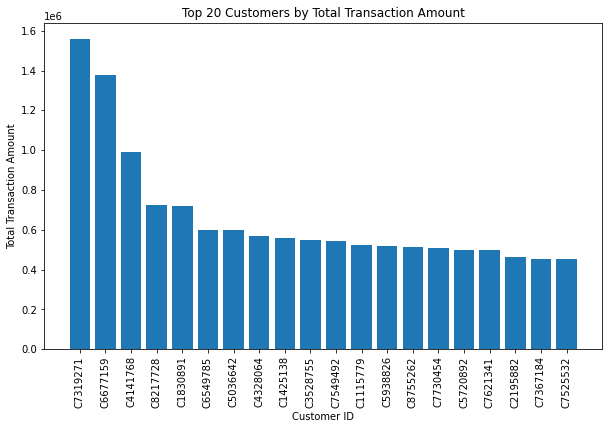

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'total_transaction_amount_pd' is a DataFrame with customer transaction data

# Filter unrealistic dates and fill missing values
df_filtered = bank_df.filter(col("CustomerDOB") > lit("1900-01-01"))
df_filtered = df_filtered.fillna({"CustAccountBalance": 0, "TransactionAmount": 0})

# Calculate total transaction amount per customer
total_transaction_amount = df_filtered.groupBy("CustomerID").sum("TransactionAmount")
total_transaction_amount_pd = total_transaction_amount.toPandas()

# Select top N customers by transaction amount
top_n = 20
top_customers = total_transaction_amount_pd.nlargest(top_n, 'sum(TransactionAmount)')

# Plot the top N customers
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'], top_customers['sum(TransactionAmount)'])
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.title('Top {} Customers by Total Transaction Amount'.format(top_n))
plt.xticks(rotation=90)
plt.show()
